In [78]:
#import the minst csv 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#read the csv file
df = pd.read_csv('mnist_train.csv')
df.head()


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


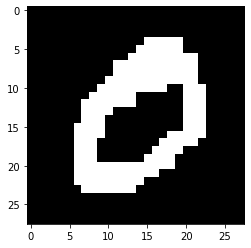

In [10]:
#split the data into features and labels
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

#show the image
plt.imshow(X[0].reshape(28,28),cmap='gray')


#convert the data into 1 and 0
X[X>0]=1

#plot the image

plt.imshow(X[1].reshape(28,28),cmap='gray')

In [11]:
y

array([5, 0, 4, ..., 5, 6, 8], dtype=int64)

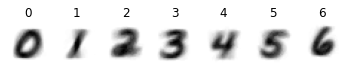

1.0114942528735633
0.008547008547008548
[[0.097]
 [0.116]
 [0.099]
 [0.093]
 [0.105]
 [0.092]
 [0.094]
 [0.117]
 [0.087]
 [0.1  ]]


In [115]:
# Every Pixel has 2 values and 10 classes
# So we need 2*784*10 parameters
# We will use 2*784*10 = 15680 parameters

#initialize the parameters
w = np.ones((2, 784, 10)) #otherwise 0 probabilities ruin everything

#w[j][i][k] 
#w: occurence; proportional to proability
#j: Pixel value 0 or 1
#i: Pixel index
#k: Class

#Probability of class k given pixel i has value j

occurence = np.zeros((10, 1))

for i in range(0, 1000): 
        for j in range(0, 784):
            w[0][j][y[i]] += 1 - X[i][j]
            w[1][j][y[i]] += X[i][j]
        occurence[y[i]] += 1
        
#normalize the parameters

for i in range(0, 10):
    w[0][:,i] = w[0][:,i]/occurence[i] * 1
    w[1][:,i] = w[1][:,i]/occurence[i] * 1

#normalize the occurence
occurence = occurence/1000
        

        

# plot 5 images of 5 different classes next to each other
for i in range(0, 7):
    plt.subplot(1, 7, i+1)
    plt.imshow(w[0][:,i].reshape(28,28),cmap='gray')
    plt.title(i)
    plt.axis('off')
plt.show()

# print max and min values of the parameters
print(np.max(w))
print(np.min(w))
print(occurence)


 



In [112]:
def classified(classify):
    #check the probability of the image for each class
    prob = np.ones((10, 1))
    prob = prob*occurence

    for i in range(0, 10):
        for j in range(0, 784):
            prob[i] *= w[classify[j]][j][i]
            
            

    return prob


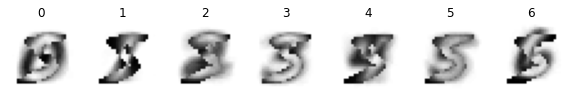

In [117]:
# plot w[classify[j]][j][i]

classify = X[0]

c = np.zeros((784, 1)) 

for i in range(0, 7):
    for j in range(0, 784):
        c[j] = w[classify[j]][j][i]

    plt.subplot(1, 7, i+1)
    
    plt.imshow(c.reshape(28,28),cmap='gray')
    
    plt.title(i)
    plt.axis('off')
    #make the plot bigger
    plt.gcf().set_size_inches(10, 10)

plt.show()




In [76]:
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
  
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
  
# making predictions on the testing set

y_pred = gnb.predict(X_test)
  
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 54.19583333333333


7
[9]
----
2
[6]
----
8
[1]
----
6
[6]
----
9
[9]
----


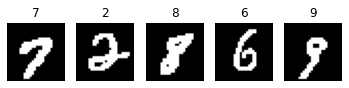

In [116]:
start = 15
#classify a random image
for i in range(0, 5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X[i + start].reshape(28,28),cmap='gray')
    plt.title(np.argmax(classified(X[i + start])))
    plt.axis('off')
    
    
    print(np.argmax(classified(X[i + start])))
    #print the result of gnb 
    print(gnb.predict(X[i + start].reshape(1, -1)))
    print("----")

wrong prediction
prediction:  9
actual:  8


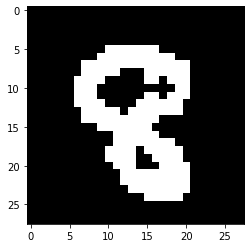

wrong prediction
prediction:  9
actual:  4


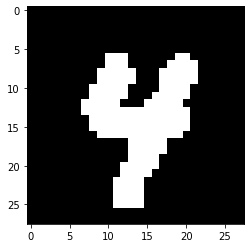

wrong prediction
prediction:  8
actual:  2


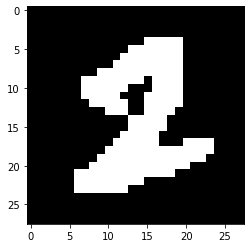

wrong prediction
prediction:  0
actual:  7


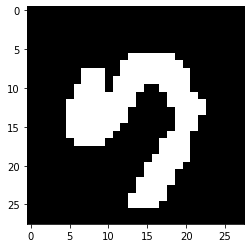

wrong prediction
prediction:  9
actual:  7


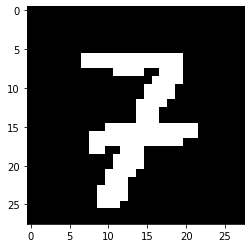

wrong prediction
prediction:  5
actual:  8


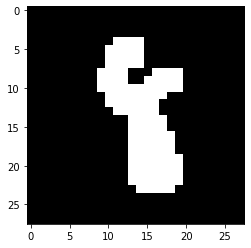

wrong prediction
prediction:  2
actual:  4


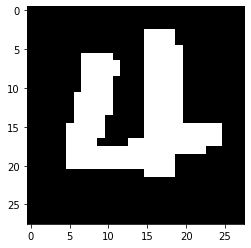

wrong prediction
prediction:  5
actual:  1


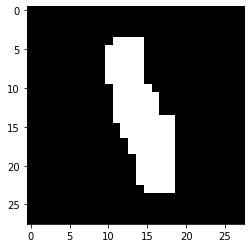

wrong prediction
prediction:  1
actual:  3


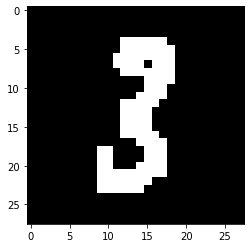

wrong prediction
prediction:  1
actual:  6


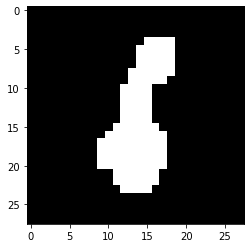

wrong prediction
prediction:  9
actual:  4


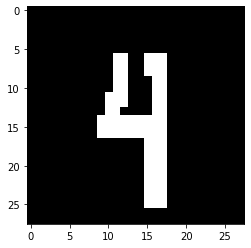

wrong prediction
prediction:  9
actual:  4


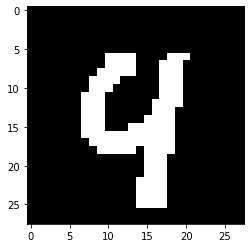

wrong prediction
prediction:  2
actual:  7


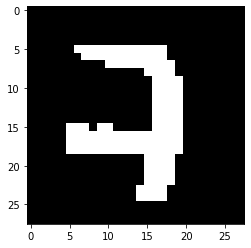

wrong prediction
prediction:  5
actual:  0


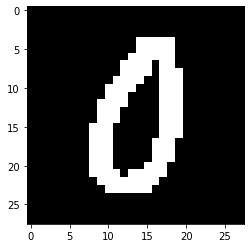

wrong prediction
prediction:  3
actual:  8


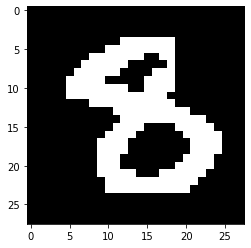

wrong prediction
prediction:  1
actual:  8


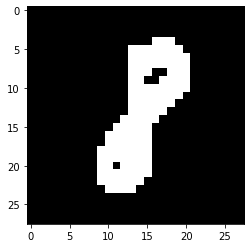

wrong prediction
prediction:  9
actual:  4


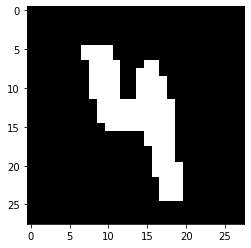

wrong prediction
prediction:  5
actual:  3


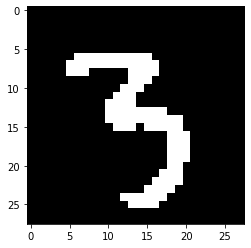

wrong prediction
prediction:  5
actual:  3


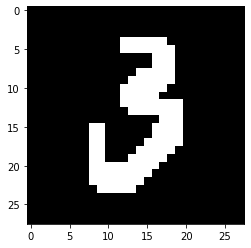

wrong prediction
prediction:  8
actual:  2


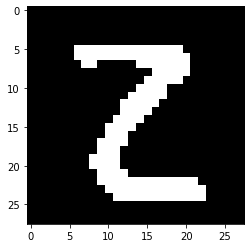

wrong prediction
prediction:  4
actual:  3


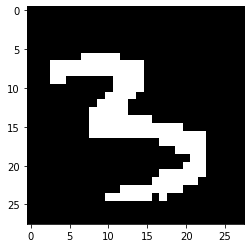

wrong prediction
prediction:  7
actual:  3


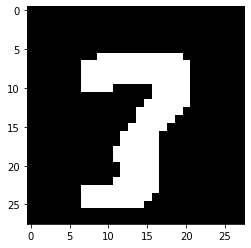

In [121]:
#evaluate the model
for i in range(2000,2100): 
    prediction = np.argmax(classified(X[i]))
    if prediction != y[i]:
        print("wrong prediction")
        print("prediction: ", prediction)
        print("actual: ", y[i])
        plt.imshow(X[i].reshape(28,28),cmap='gray')
        plt.show()
        